# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Главная задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файл с данными и изучаем общую информацию. 

Откроем файл и взглянем на первые 10 строк.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics 

In [2]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t', engine='python', decimal='.')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', engine='python', decimal='.')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Сразу можно отметить большое количество NaN. Интересно, что картографические данные отсутствуют у двух строк из пригородов. Данные взяты как минимум за 2015-2019 года. Много пропусков есть и в данных, которые владелец должен знать о своей квартире, такие как размер кухни или количество балконов. Пропуски в `days_exposition` возможно связаны с тем, что эти квартиры на момент выгрузки данных ещё не были проданы.

In [3]:
df.info()
df['is_apartment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

False    2725
True       50
Name: is_apartment, dtype: int64

Пропусков много, но основные столбцы заполнены. Округлим числа и заменим на целочисленные типы. Приведем столбец `first_day_exposition` к типу datetime, а `is_apartment` сделаем булевым типом. Всего квартир-апартаментов 50 штук, меньше процента.

Посмотрим на данные через графики.

Text(0.5, 1.0, 'hi')

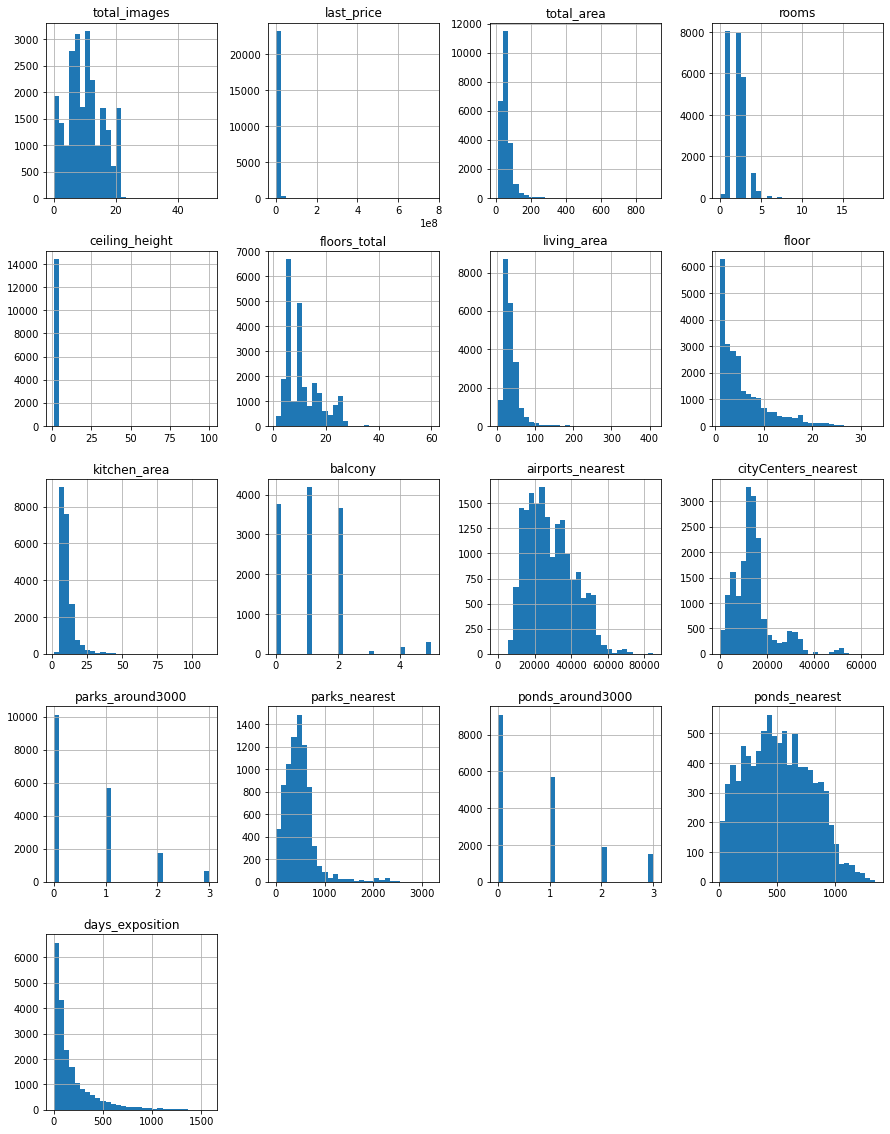

In [4]:
df.hist(figsize=(15, 20), bins=30)
plt.title('hi')

Много графиков прижаты к левому краю, например, `total_area`, `rooms`, `ceiling_height` - это говорит о выбросах. 

Рассмотрим более подробно данные.

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Если общая площаль в 900 метров возможна, то высота потолков в 100 метров маловероятна. 

In [6]:
df.select_dtypes(include=['object']).describe()

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


Количество населенных пунктов достаточно велико - 364 наименований.

### Предобработка данных

Построим тепловую карту пропусков данных.

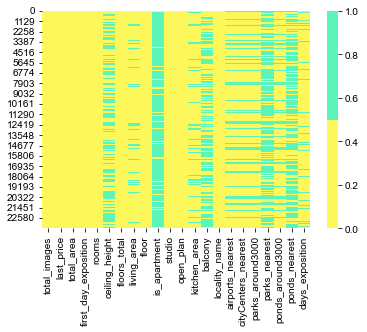

In [7]:
sns.heatmap(df.isnull(), cmap=sns.color_palette(['#fcf75b', '#5bf5bc']))
sns.set(rc = {'figure.figsize':(8, 6)})

Сразу заметно, что многие картографические данные для некоторых строк не заполнены полностью. Проверим теорию, что это связано с местоположением недвижимости. 

In [63]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пропуски в столбцах в %' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

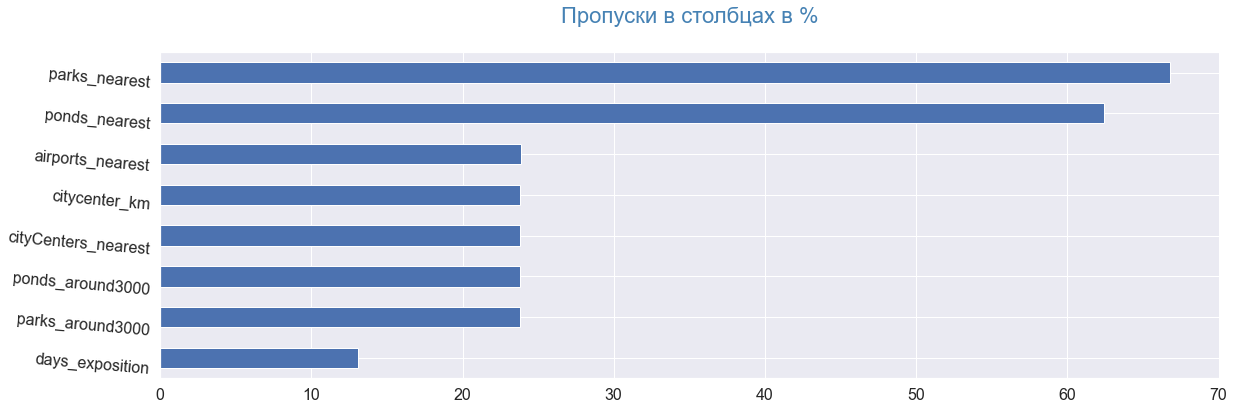

In [64]:
pass_value_barh(df)

In [10]:
s1 = df.loc[df['airports_nearest'].isnull()]['locality_name'].value_counts()
s1.rename('locality_empty_coord', inplace = True)
s2 = df['locality_name'].value_counts()
pd.concat([s2, s1], axis=1, join='inner').head(10)

,locality_name,locality_empty_coord
Санкт-Петербург,15721,85
посёлок Мурино,522,522
посёлок Шушары,440,4
Всеволожск,398,398
Колпино,338,1
Гатчина,307,307
деревня Кудрово,299,299
Выборг,237,237
Красное Село,178,2
Кудрово,173,173


Если населенный пункт входит в состав Санкт-Петербурга, то данные по расстоянию практически полностью заполнены, если населенный пункт относится к Ленинградской области - данных нет. Пока можно оставить данные как есть и решить позже нужно ли что-то с этим делать. 

Проведем начальную предобработку данных изменим тип данных и заполним частично пропуски.

In [11]:
# переводим цену объекта к типу int
df['last_price'] = df['last_price'].astype(int)

# приводим столбец с датой размещения объявление к типу datatime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# заполним пустые строки с этажностью дома, этажом квартиры
df['floors_total'] = df['floors_total'].fillna(df['floor']).astype(int)

# приведем апартаменты в булев тип и заполним пропуски False-значением
df['is_apartment'] = df['is_apartment'].fillna(False).astype(bool)

# количество балконов будем хранить в int, а пропуски заполним нулем
df['balcony'] = df['balcony'].fillna('0').astype('int')

# картографические данные либо количественные, либо в метрах, поэтому переводим всё в int
df['airports_nearest'] = df['airports_nearest'].astype('int', errors='ignore')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int', errors='ignore')
df['parks_around3000'] = df['parks_around3000'].astype('int', errors='ignore')
df['parks_nearest'] = df['parks_nearest'].astype('int', errors='ignore')
df['ponds_around3000'] = df['ponds_around3000'].astype('int', errors='ignore')
df['ponds_nearest'] = df['ponds_nearest'].astype('int', errors='ignore')

# пропуски в потолках заполним медианной - 2,65 м, обычно высота потолков в России варьируется между 2,5 и 2,7 м
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Одна из целей нашего исследования - оценить как долго продаются квартиры и найти закономерности. Отсутствие значений в столбце `days_exposition` затрудняет расчеты, если объявление не снято в течение года, то это нормально. Объект может быть по завышенной цене или иметь какое-либо ограничение по продаже, с которым покупатели не спешат сталкиваться. 

Однако, объявления размещаются с целью продажи и если продавец не спешит снизить цену или что-то поменять в нём, то следует оставить эти пропуски, чтобы иметь данные по объявлениям, которые закончились продажей и нет. Оставляем пропуски.

Заполним пропуски в столбце `living_area` медианным значением сгруппировав данные по количеству комнат. 

In [12]:
df.loc[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000,32.80,2018-02-19,1,2.65,9,NaN,2,False,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,NaN,1,False,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.00,2018-11-18,1,2.65,22,NaN,3,False,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12,NaN,5,False,...,NaN,0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000,88.00,2018-01-12,4,2.55,10,NaN,1,False,...,NaN,0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000,45.60,2018-02-08,1,2.80,9,NaN,2,False,...,NaN,0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000,35.00,2017-12-08,1,2.65,9,NaN,4,False,...,NaN,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [13]:
''' # старое решение
for rooms in df['rooms'].unique():
    df.loc[(df['rooms'] == rooms) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[df['rooms'] == rooms, 'living_area'].median()
    
df = df.loc[df['total_area'] - df['living_area'] > 0] # удалим одну строку, в которой нарушены законы геометрии

df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area'] - df['living_area']) * 0.70)
df.loc[df['kitchen_area'] < 0] 
df[df.total_area*0.9 <= (df.living_area + df.kitchen_area)]
'''
def fill_living_area(total_area, living_area, kitchen_area): # функция, которая заполняет жилую площадь
    if pd.isna(living_area):
        if pd.isna(kitchen_area):
            return total_area * 0.60
        else:
            return (total_area - kitchen_area) * 0.7
    else:
        return living_area
df['living_area'] = df.apply(lambda x: fill_living_area(x.total_area, x.living_area, x.kitchen_area), axis=1)

df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area'] - df['living_area']) * 0.70)

В 49 строках отсутствует населенный пункт, проверим есть ли у этих строк расстояние до аэропорта. Мы уже выяснили, что у объектов расположенных на территории Санкт-Петербурга есть картографические данные. 

In [14]:
df.loc[df['locality_name'].isnull(), 'airports_nearest'].count()

41

41 значение - это около 80%, заполним у таких строк пропуски, а оставшиеся 8 удалим.

In [15]:
df.loc[(df['locality_name'].isnull()) & (~df['airports_nearest'].isnull()), 'locality_name'] = 'Санкт-Петербург'
df = df.loc[~df['locality_name'].isnull()]

Изучим столбец с населенным пунктом.

In [16]:
df.select_dtypes(include=['object']).describe()

,locality_name
count,23691
unique,364
top,Санкт-Петербург
freq,15762


364 - это много. Заменим букву Ё на Е и посмотрим на данные, отсортировав по алфавиту топонимы.

In [17]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')

In [18]:
sorted(df['locality_name'].unique(),key = lambda x: x.split()[-1])

['деревня Агалатово',
 'поселок Александровская',
 'поселок Алексеевка',
 'поселок Аннино',
 'деревня Аро',
 'поселок Барышево',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Старые Бегуницы',
 'деревня Белогорка',
 'поселок Белоостров',
 'Бокситогорск',
 'поселок городского типа Красный Бор',
 'Сосновый Бор',
 'деревня Чудской Бор',
 'деревня Бор',
 'деревня Трубников Бор',
 'поселок Пансионат Зеленый Бор',
 'поселок Бугры',
 'городской поселок Будогощь',
 'деревня Ваганово',
 'поселок городского типа Важины',
 'деревня Вартемяги',
 'деревня Малое Верево',
 'поселок станции Вещево',
 'поселок при железнодорожной станции Вещево',
 'городской поселок Виллози',
 'поселок городского типа Вознесенье',
 'поселок Возрождение',
 'поселок Войсковицы',
 'поселок Войскорово',
 'поселок Володарское',
 'Волосово',
 'Волхов',
 'деревня Большая Вруда',
 'Всеволожск',
 'Выборг',
 'поселок городского типа Вырица',
 'деревня Выскатка',
 'поселок Высокоключевой',
 'Высоцк',
 'поселок Гаврилово',
 'д

Много поселений с разным типом населенного пункта, но одинаковым наименованием. Исправим это.

In [19]:
duples_dict = {
    'поселок при железнодорожной станции Вещево': 'поселок станции Вещево',
    'поселок Гарболово': 'деревня Гарболово',
    'поселок станции Громово': 'поселок Громово',
    'поселок Зимитицы': 'деревня Зимитицы',
    'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора',
    'деревня Калитино': 'поселок Калитино',
    'деревня Кудрово': 'Кудрово',
    'городской поселок Лесогорский': 'поселок городского типа Лесогорский',
    'Любань': 'поселок Любань',
    'городской поселок Мга': 'поселок городского типа Мга',
    'поселок Мурино': 'Мурино',
    'городской поселок Назия': 'поселок городского типа Назия',
    'Никольское': 'село Никольское',
    'городской поселок Павлово': 'село Павлово', 
    'поселок городского типа Павлово': 'село Павлово',
    'поселок при железнодорожной станции Приветнинское': 'поселок станции Приветнинское',
    'поселок городского типа Приладожский': 'садовое товарищество Приладожский',
    'деревня Рабитицы': 'поселок Рабитицы',
    'поселок городского типа Рахья': 'садовое товарищество Рахья',
    'поселок городского типа Рощино': 'городской поселок Рощино',
    'поселок Рябово': 'поселок городского типа Рябово',
    'поселок городского типа Советский': 'городской поселок Советский',
    'деревня Федоровское': 'городской поселок Федоровское',
    'поселок Щеглово': 'деревня Щеглово'
}
df['locality_name'] = df['locality_name'].replace(duples_dict)


Деревня Федоровское стала поселком в 2017 году. Поздравляем🥳  
Это о причинах неявных дубликатов в выборке.  
Посмотрим на ящики площадей недвижимости.

<AxesSubplot:>

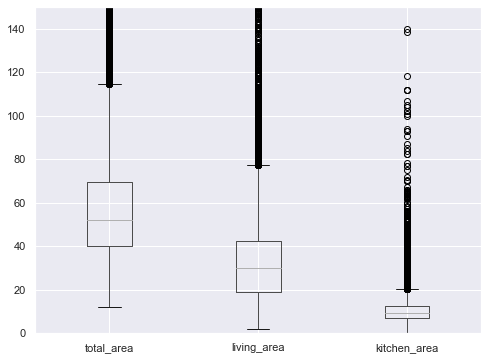

In [20]:
plt.ylim(0, 150)
df.boxplot(column=['total_area', 'living_area', 'kitchen_area'])

Расположение ящиков вполне логично, но за усами много точек. Посмотрим их количество у общей площади.

In [21]:
df[df['total_area'] > 115]['total_area'].count()

1217

1200 объектов это 5% от общих данных, это примерно по одному объекту в день. Не так много. 
Я подробней изучила рынок недвижимости с площадью более 150 метров, там довольно своеобразные квартиры, это например элитное жилье, или продажа сразу всего многоквартирного дома или отеля. В общем, специфические объекты. Я предлагаю не судить о рынке недвижимости в Геленжике по одному дворцу. И удалить строки с площадью более 150 метров.

In [22]:
df = df[df['total_area'] < 150]
df.loc[(df['living_area'] > df['total_area']), 'total_area'] = df['living_area']

В высоте пололков встречаются ошибки явные, как, например, пропущенные запятые, и не явные, но легко удаляемые.

In [23]:
#sorted(df['ceiling_height'].unique())
df['ceiling_height'] = df['ceiling_height'].replace({24.0: 2.4,
                                                    25.0: 2.5,
                                                    26.0: 2.6,
                                                    27.0: 2.7,
                                                    27.5: 2.75,
                                                    32.0: 3.2})

df = df.query('2.39 < ceiling_height < 12')
# и изменим ошибку в цене квартиры, которую я заметила в самом конце проекта, а теперь решила незаметно добавить сюда
df['last_price'] = df['last_price'].replace({12190: 12190000})

Этажность самого высокого жилого здания в Санкт-Петербурге - 37. Так и запишем.

In [24]:
df = df.query('floors_total <= 37')

Очень странный расклад по количеству балконов. Квартиры с пятью балконами встречаются чаще, чем с тремя. 
Я изучила сайты по покупке недвижимости. И обычно фильтр на балконы в виде чекбокса, то есть покупатель выбирает нужен ли ему балкон или нет. Количество балконов если и указано, то в разделе дополнительной информации.  
Поэтому я оставляю всё как есть. 

In [25]:
df['balcony'].value_counts()


0    14827
1     4089
2     3627
5      289
4      174
3       76
Name: balcony, dtype: int64

In [26]:
df = df.loc[df['last_price'] < 40000000]

In [27]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,040.00","23,040.00","23,040.00","20,022.00","23,040.00","23,040.00","23,040.00","23,040.00","23,040.00"
min,0.00,12.00,2.40,1.00,"430,000.00",2.00,0.00,1.00,1.00
max,7.00,149.60,10.30,"1,580.00","39,990,000.00",128.00,64.00,33.00,36.00


In [28]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23040 non-null  int64         
 1   last_price            23040 non-null  int64         
 2   total_area            23040 non-null  float64       
 3   first_day_exposition  23040 non-null  datetime64[ns]
 4   rooms                 23040 non-null  int64         
 5   ceiling_height        23040 non-null  float64       
 6   floors_total          23040 non-null  int32         
 7   living_area           23040 non-null  float64       
 8   floor                 23040 non-null  int64         
 9   is_apartment          23040 non-null  bool          
 10  studio                23040 non-null  bool          
 11  open_plan             23040 non-null  bool          
 12  kitchen_area          23040 non-null  float64       
 13  balcony         

### Добавление в таблицу новых столбцов

Добавим столбец с ценой за метр.

In [29]:
df['price_per_meter'] = df['last_price'] / df['total_area']
df['price_per_meter'] = df['price_per_meter'].astype('int')

Создадим столбец с днем недели, месяцем и годом создания объявления.

In [30]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [31]:
df['month'] = df['first_day_exposition'].dt.month

In [32]:
df['year'] = df['first_day_exposition'].dt.year

Создадим столбец с типом этажа квартиры.

In [33]:
def floor_type(floor, floors):
    if floor == 1:
        return 'первый'
    elif floor == floors:
        return 'последний'
    else:
        return 'другой'
    
df['floor_type'] = df.apply(lambda x: floor_type(x.floor, x.floors_total), axis=1)

И столбец с расстоянием до центра города в километрах.

In [34]:
df['citycenter_km'] = round(df['cityCenters_nearest'] / 1000, 0)

### Проведение исследовательского анализа данных

Давайте на одном граффике рассмотрим данные по площадям. 

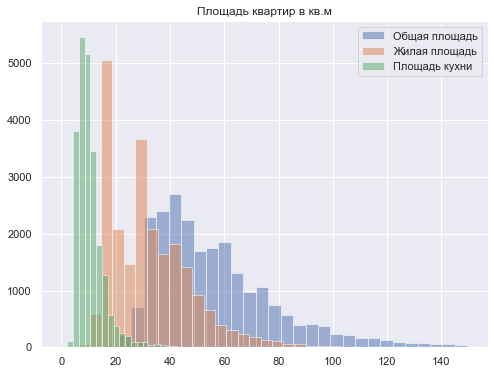

In [35]:
plt.hist(df['total_area'], alpha=0.5, bins=30, label='Общая площадь')
plt.hist(df['living_area'], alpha=0.5, bins=30, label='Жилая площадь')
plt.hist(df['kitchen_area'], alpha=0.5, bins=30, label='Площадь кухни')
plt.legend(loc='upper right')
plt.title('Площадь квартир в кв.м')
plt.show()

В жилой площади наблюбаются пики около 18 и 30 метров, это связано с преобладающим количеством однокомнатных и двухкомнатных квартир и нормами жилплощади на одного человека. Например, в России нормы от 9 до 12 кв.метров, в СССР было 7 кв.метров.  
Площадь кухни обычно не превышает 10 кв.метров. Массовая застройка в СССР, например, так называемые хрущевки, имела площадь кухни 6 кв.метров. Современные квартиры уже больше о комфорте, ценной в пару метров.  

Стоимость квартир я хочу рассмотреть, разделив на две группы со стоимостью более 20 млн.руб. и менее. Наблюдается обратная зависимость между ценой квартиры и расстоянием до центра. Для удобства цену будем рассмотривать в тысячах рублей.

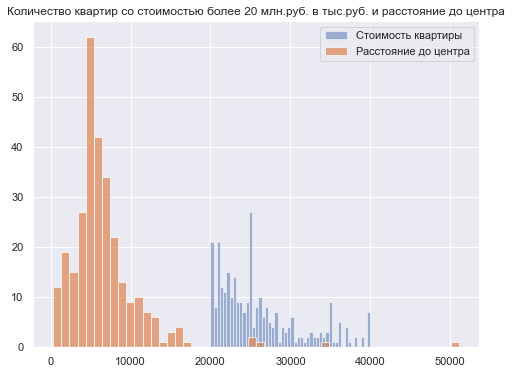

In [36]:
higt_price_realty = df.loc[df['last_price'] >= 20000000]
plt.hist(higt_price_realty['last_price'] / 1000, alpha=0.5, bins=50, label='Стоимость квартиры')
plt.hist(higt_price_realty['cityCenters_nearest'], alpha=0.7, bins=50, label='Расстояние до центра')
plt.legend(loc='upper right')
plt.title('Количество квартир со стоимостью более 20 млн.руб. в тыс.руб. и расстояние до центра')
plt.show()

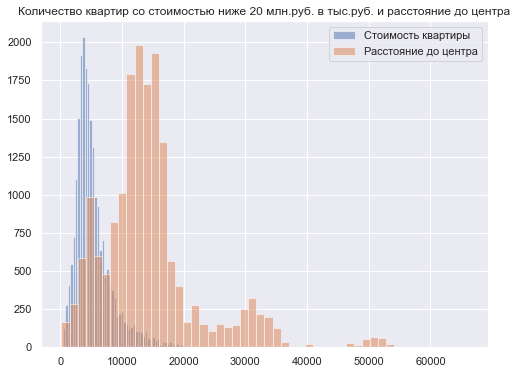

In [37]:
low_price_realty = df.loc[df['last_price'] < 20000000]
plt.hist(low_price_realty['last_price'] / 1000, alpha=0.5, bins=50, label='Стоимость квартиры')
plt.hist(low_price_realty['cityCenters_nearest'], alpha=0.5, bins=50, label='Расстояние до центра')
plt.legend(loc='upper right')
plt.title('Количество квартир со стоимостью ниже 20 млн.руб. в тыс.руб. и расстояние до центра')
plt.show()

В центре можно купить и дорогое жилье и не очень, но определенно, чем дальше от центра, тем дешевле квартиры.

Количество комнат это важный параметр при выборе квартиры. Нулекомнатные квартиры - это студии. Преобладают квартиры с 1 до 3 комнат. 

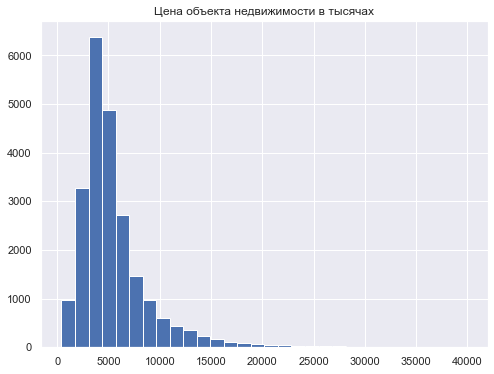

In [38]:
df['last_price_thousands'] = df['last_price'] / 1000
df['last_price_thousands'] = df['last_price_thousands'].astype('int')
plt.hist(df['last_price_thousands'], bins=30)
plt.title('Цена объекта недвижимости в тысячах')
plt.show()

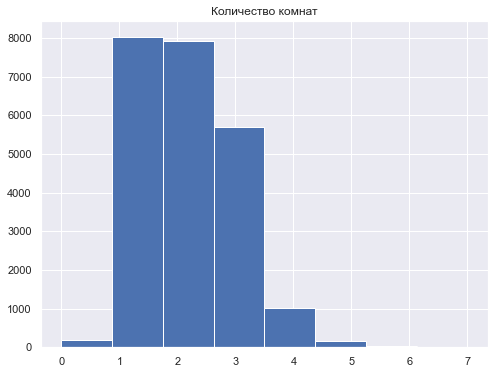

,living_area
rooms,
0,18.650204
1,18.260035
2,31.825202
3,46.670193
4,61.084871
5,76.702312
6,83.891304
7,89.557500


In [39]:
plt.hist(df['rooms'], bins=8)
plt.title('Количество комнат')
plt.show()
df.pivot_table(index='rooms', values='living_area', aggfunc='mean')

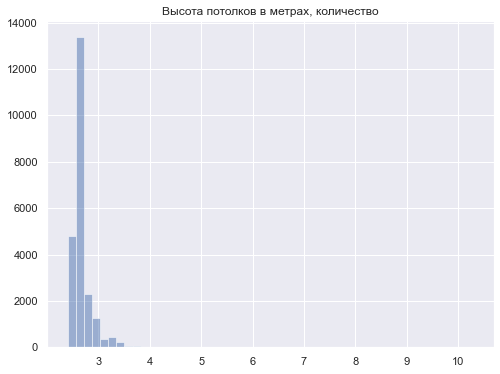

In [40]:
plt.hist(df['ceiling_height'], bins=50, alpha=0.5)
plt.title('Высота потолков в метрах, количество')
plt.show()

Стандартные квартиры обычно имеют высоту потолков от 2,4 до 2,7 метров. Как правило, для этитноного жилья высота потолков выше 3 метров. Под квартирами в 5 метров и выше, обычно скрываются двухэтажные квартиры или квартиры с нестандартной планировкой.

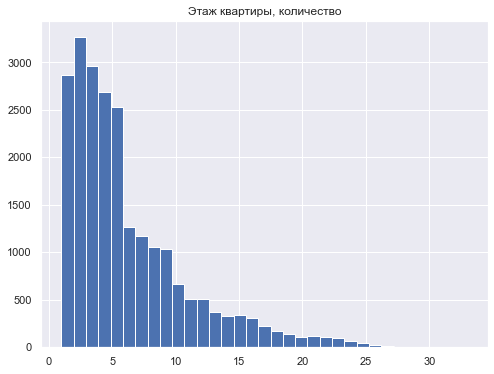

In [41]:
plt.hist(df['floor'], bins=33)
plt.title('Этаж квартиры, количество')
plt.show()

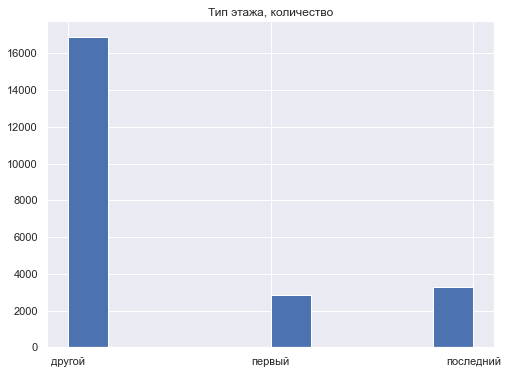

In [42]:
plt.hist(df['floor_type'], bins=10)
plt.title('Тип этажа, количество')
plt.show()

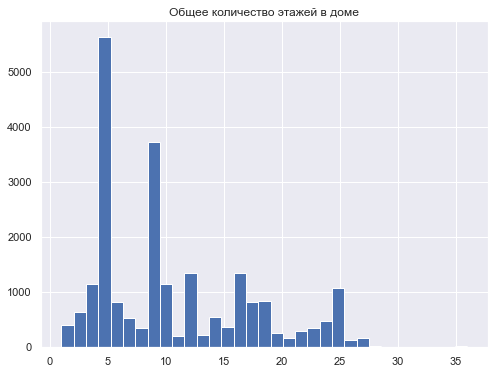

In [43]:
plt.hist(df['floors_total'], bins=33)
plt.title('Общее количество этажей в доме')
plt.show()

Пятиэтажные и девятиэтажные квартиры - самые встречающиеся дома. Квартиры на первом этаже встречаются реже, чем на последнем. Это связано с тем, что часто первый этаж занят коммерческой недвижимостью. 

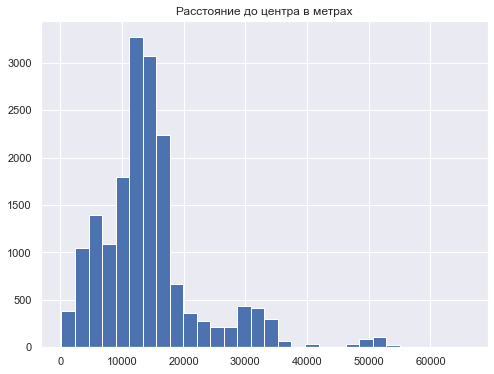

In [44]:
plt.hist(df['cityCenters_nearest'], bins=30)
plt.title('Расстояние до центра в метрах')
plt.show()

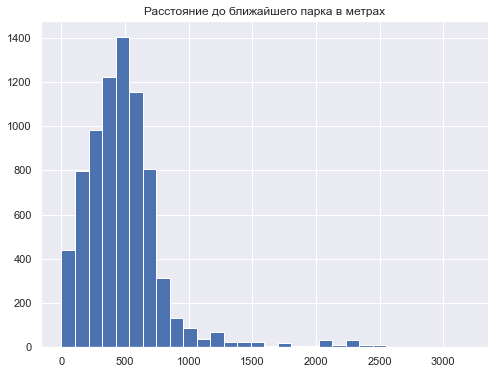

In [45]:
plt.hist(df['parks_nearest'], bins=30)
plt.title('Расстояние до ближайшего парка в метрах')
plt.show()

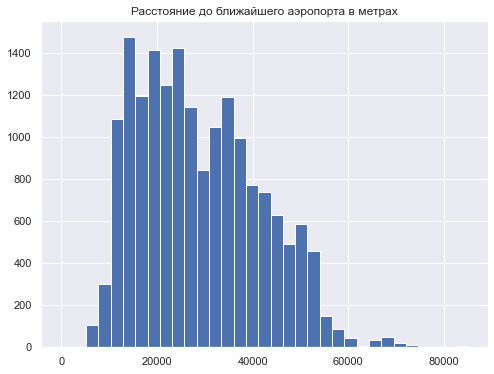

In [46]:
plt.hist(df['airports_nearest'], bins=33)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.show()

С доступностью к паркам в Санкт-Петербурге всё хорошо. Аэропорт находится за пределами КАД, и квартир расположенных близко к нему мало. Но чем дальше аэропорт, тем ближе финская граница, тут уже покупатель выбирает сам, что ему предпочтительней.

Рассмотрим с какой частотой в разрезе месяца и дня недели выкладывали объявление о продаже недвижимости.

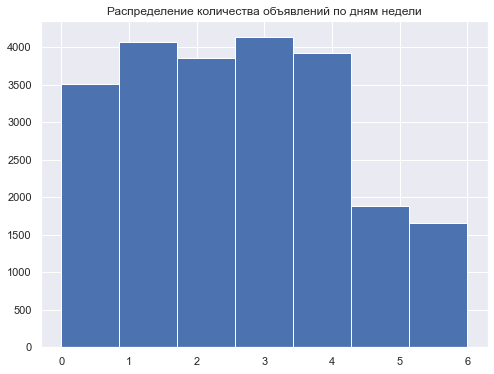

In [47]:
plt.hist(df['weekday'], bins=7)
plt.title('Распределение количества объявлений по дням недели')
plt.show()

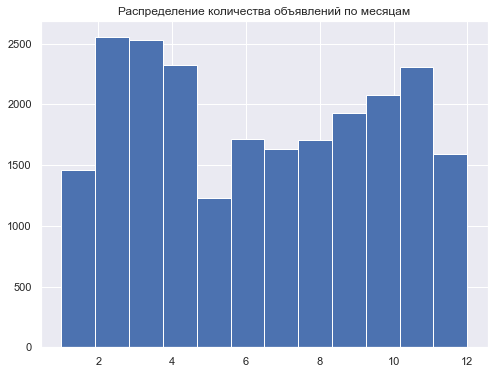

In [48]:
plt.hist(df['month'], bins=12)
plt.title('Распределение количества объявлений по месяцам')
plt.show()

<AxesSubplot:xlabel='None-weekday', ylabel='month'>

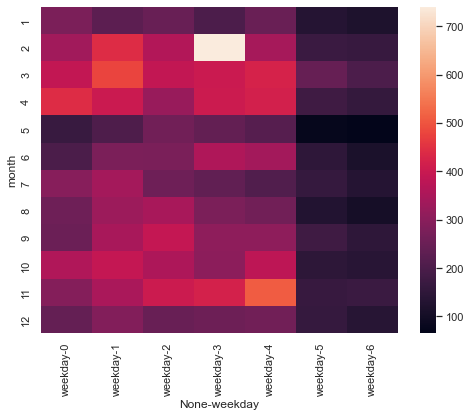

In [49]:
sns.heatmap(df.pivot_table(index='month', columns='weekday', aggfunc={'weekday': 'count'}))

Здесь всё ожидаемо, в выходные выкладывают мало объявлений, потому что нужно отдыхать. В декабре, потому что скоро новый год, не до того. В январе, все приходят в себя после каникул. В мае, майские праздники и шашлыки. Летом все берут отпуск.  
Если планируете покупать квартиру, лучший период - с фераля по апрель и с сентября по ноябрь.

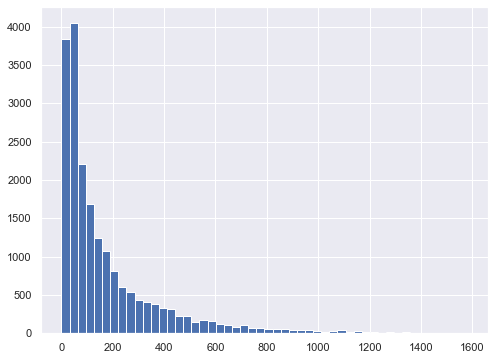

'Медиана продажи квартиры в днях: '

94.0

'Среднее значение продажи квартиры в днях: '

178.10158825292177

In [50]:
plt.hist(df['days_exposition'], bins=50)
plt.show()
display('Медиана продажи квартиры в днях: ', df['days_exposition'].median())
display('Среднее значение продажи квартиры в днях: ', df['days_exposition'].mean())

In [51]:
display('Мода дней размещения объявления', statistics.mode(df['days_exposition']))
display(df['days_exposition'].value_counts().head(10))
len(df.groupby(['total_area', 'living_area', 'cityCenters_nearest'])) # проверим есть ли повторно размещенные объявления

'Мода дней размещения объявления'

45.00000000000001

45.0    873
60.0    538
7.0     232
30.0    205
90.0    181
4.0     175
3.0     158
5.0     148
14.0    144
9.0     139
Name: days_exposition, dtype: int64

21294

В топе объявления по 45, 60, 30 и 90 дней. И это не случайно, согласно условиям размещения объявлений, у каждого объявления есть срок бесплатной публикации. Я проверили совсем не явные дубликаты, их либо оказалось очень мало, но скорее всего это совпадения. Модерация у Яндекса работает хорошо.  
Опять мне не хватает данных о том, кто разместил объявление, частное либо или агент. Поэтому мое предположение, что кратные дни встречаются у объявлений размещенных у агентов, даже если к ним поступают звонки по объявлениям, квартиры которые были проданы, то они всегда могут предложить другие варианты или заключить контракт с покупателем на предоставление услуг по поиску квартиры.  

Больше половины квартир продаются в перые три месяца. Так что на месте продавца, я бы что-то меняла в объявлении, если продажа не произошла в первые три месяца, конечно нужно также учитывать месяц размещения объявления. 

Рассмотрим зависимость стоимости квартиры к различным параметрам.

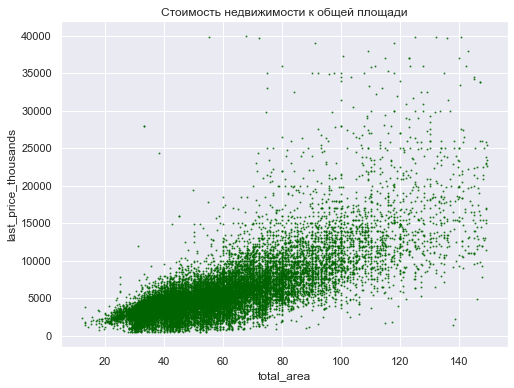

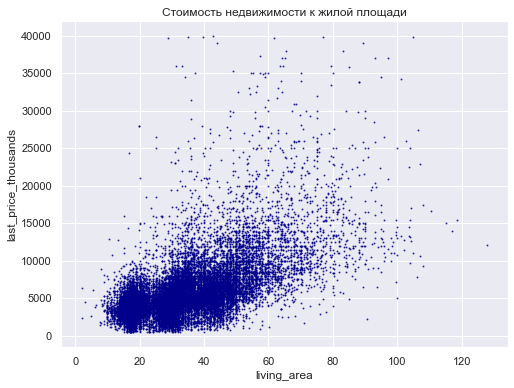

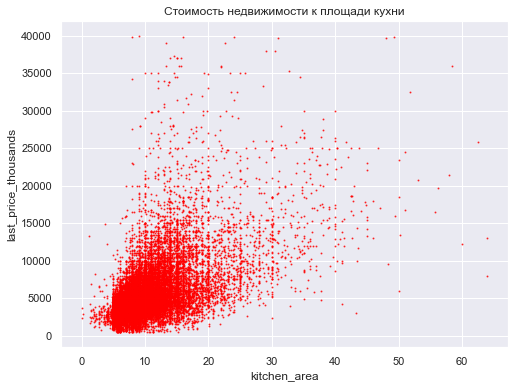

In [52]:
df.plot(x='total_area', y='last_price_thousands', s=1, color='DarkGreen', kind='scatter', alpha=0.7, \
        title='Стоимость недвижимости к общей площади')
df.plot(x='living_area', y='last_price_thousands', s=1, color='DarkBlue', kind='scatter', alpha=0.7, \
       title='Стоимость недвижимости к жилой площади') 
df.plot(x='kitchen_area', y='last_price_thousands', s=1, color='Red', kind='scatter', alpha=0.7, \
       title='Стоимость недвижимости к площади кухни')
plt.show()

In [53]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,citycenter_km,last_price_thousands
total_images,1.000000,0.157438,0.123334,0.096243,0.039494,0.015496,0.104148,0.032838,0.012124,-0.029323,...,-0.006059,-0.017868,0.000476,-0.030971,0.135522,-0.009224,0.005265,0.144803,-0.042043,0.157441
last_price,0.157438,1.000000,0.742060,0.440696,0.362444,0.085447,0.623690,0.076063,0.027818,-0.052534,...,0.036138,0.192546,-0.094269,0.117500,0.731978,-0.008710,0.002991,-0.025883,-0.344046,1.000000
total_area,0.123334,0.742060,1.000000,0.790359,0.317381,-0.038652,0.921837,-0.025151,0.019855,-0.101865,...,0.013142,0.140152,-0.063778,0.151330,0.165831,-0.007736,0.008016,-0.074742,-0.217298,0.742059
rooms,0.096243,0.440696,0.790359,1.000000,0.143503,-0.222163,0.868629,-0.162195,-0.000935,-0.163825,...,-0.040358,0.055578,-0.025175,0.106908,-0.069966,-0.000138,-0.002342,-0.043851,-0.137617,0.440697
ceiling_height,0.039494,0.362444,0.317381,0.143503,1.000000,-0.058788,0.269571,-0.033633,0.053928,0.014210,...,-0.041000,0.172043,-0.089882,0.081319,0.259504,-0.013960,0.000241,-0.041448,-0.257538,0.362444
floors_total,0.015496,0.085447,-0.038652,-0.222163,-0.058788,1.000000,-0.159861,0.678264,-0.023905,0.069481,...,0.094635,-0.116887,0.033682,-0.047566,0.232914,0.011682,0.015101,0.004209,0.002315,0.085446
living_area,0.104148,0.623690,0.921837,0.868629,0.269571,-0.159861,1.000000,-0.113584,0.017986,-0.072048,...,-0.024639,0.113912,-0.043760,0.133066,0.066105,-0.003283,0.002407,-0.062194,-0.199458,0.623690
floor,0.032838,0.076063,-0.025151,-0.162195,-0.033633,0.678264,-0.113584,1.000000,-0.013321,0.037094,...,0.072844,-0.073169,0.024425,-0.039484,0.180693,0.010892,0.018752,0.003982,0.004477,0.076062
is_apartment,0.012124,0.027818,0.019855,-0.000935,0.053928,-0.023905,0.017986,-0.013321,1.000000,-0.003489,...,-0.023062,0.017876,0.005167,0.004275,0.025894,-0.011012,-0.002360,0.018317,0.012093,0.027817
studio,-0.029323,-0.052534,-0.101865,-0.163825,0.014210,0.069481,-0.072048,0.037094,-0.003489,1.000000,...,0.008820,0.002661,0.001157,-0.021977,0.026741,-0.000988,0.000997,0.011498,-0.009656,-0.052534


Конечно самый известный параметр стоимости жилья, это цена за один метр. Корреляция есть. Жилая площадь коррелирует с общей площадью, поэтому цена также зависима. Кухня, как правило, в квартире одна и размер её не сильно отличается от квартиры к квартире. Зависимость слабая.

[Text(0.5, 1.0, 'Зависимость стоимости от типа этажа')]

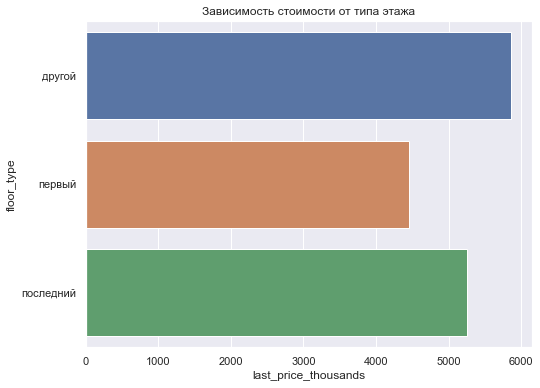

In [54]:
corr_df = df.pivot_table(index='floor_type', values=['last_price_thousands']).reset_index()
sns.barplot(x='last_price_thousands', y='floor_type', data=corr_df).set(title='Зависимость стоимости от типа этажа')

Самая низкая стоимость за квартиры расположенные на первом этаже. Не удивительно, у таких квартир много минусов. 

[Text(0.5, 1.0, 'Зависимость цены от количества комнат')]

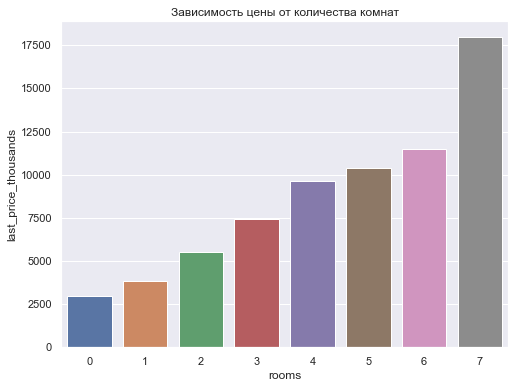

In [55]:
corr_df = df.pivot_table(index='rooms', values=['last_price_thousands']).reset_index()
sns.barplot(x='rooms', y='last_price_thousands', data=corr_df).set(title='Зависимость цены от количества комнат')

Чем больше комнат, тем больше метраж, и тем больше стоимость.

[Text(0.5, 1.0, 'Зависимость цены от дня недели')]

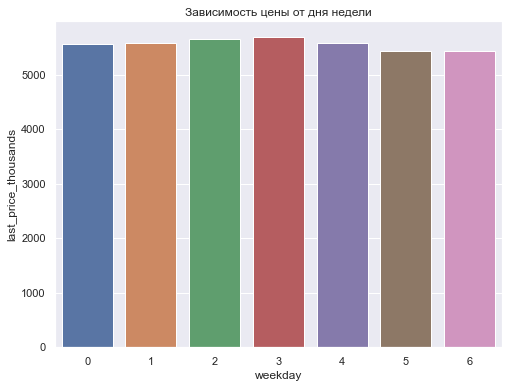

In [56]:
corr_df = df.pivot_table(index='weekday', values=['last_price_thousands']).reset_index()
sns.barplot(x='weekday', y='last_price_thousands', data=corr_df).set(title='Зависимость цены от дня недели')

Видим небольшой просадок в цене у объявлений выложенных в выходные. Интересно было бы рассмотритеть данные в разрезе, кто выложил объявление: риелтор или частное лицо. Возможно в выходные больше частных лиц выкладывают объявление, обычно их цена ниже.

[Text(0.5, 1.0, 'Зависимость стоимости от месяца размещения объявления')]

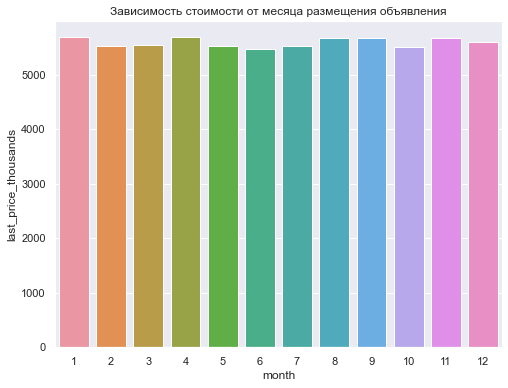

In [57]:
corr_df = df.pivot_table(index='month', values=['last_price_thousands']).reset_index()
sns.barplot(x='month', y='last_price_thousands', data=corr_df)\
.set(title='Зависимость стоимости от месяца размещения объявления')

Да, в какие-то месяцы средняя цена чуть выше. Но учитывая что мы сравнимаем месяц размещения объявления со стоимостью квартиры при сниятии объявления, на эти данные опираться нельзя. Помним, что квартиры продаются в среднем два с половиной месяца.

[Text(0.5, 1.0, 'Зависимость стоимости от года размещения объявления')]

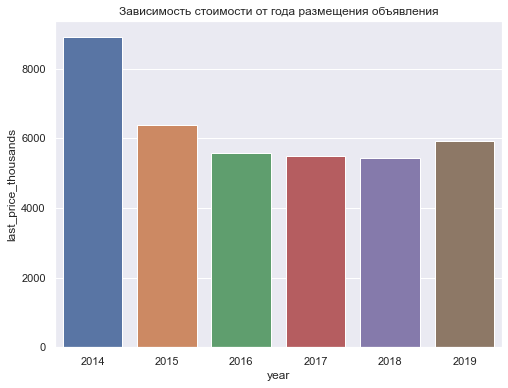

In [58]:
corr_df = df.pivot_table(index='year', values=['last_price_thousands']).reset_index()
sns.barplot(x='year', y='last_price_thousands', data=corr_df).set(title='Зависимость стоимости от года размещения объявления')

В 2014 году курс доллара вырос в двое, была паника на рынке и цена на недвижимость выросла. Всплеск эмиграции и на рынке появились многокомнатные квартиры в продаже. 

Выведем топ-10 населенных пунктов по количеству объявлений и посмотрим среднюю стоимость квадратного метра.

,locality_name,ads_count,price_per_meter
0,Санкт-Петербург,15163,111312.45
1,Пушкин,359,102866.08
2,Кудрово,471,95325.73
3,поселок Парголово,326,90331.84
4,Мурино,590,86087.06
5,поселок Шушары,440,78676.90
6,Колпино,337,75332.87
7,Всеволожск,396,68767.79
8,Гатчина,307,68745.69
9,Выборг,233,58171.97


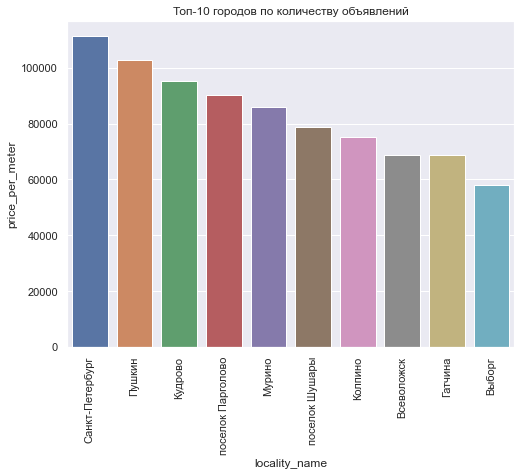

In [59]:
top_local = df.pivot_table(index='locality_name', aggfunc={'locality_name': 'count', 'price_per_meter': 'mean'})
top_local = top_local.rename(columns={'locality_name': 'ads_count'})
top_local = top_local.sort_values(by='ads_count', ascending=False)[:10]
top_local['price_per_meter'] = round(top_local['price_per_meter'], 2)
top_local = top_local.sort_values(by='price_per_meter', ascending=False).reset_index()
sns.barplot(data=top_local, x='locality_name', y='price_per_meter').set(title='Топ-10 городов по количеству объявлений')
plt.xticks(rotation=90)
top_local

Всё ожидаемо. Замечательный город Пушкин с малоэтажной застройкой, тихими улицами и прекрасными парками занимает второе место после СПб по стоимости квартиры, но не по количеству объявлений. Никто не хочет расстоваться с недвижимостью там. Кудрино, Мурино и Шушары - кошмар урбанистов, но увы, цена за метр там ниже на половину средней заплаты в СПб.

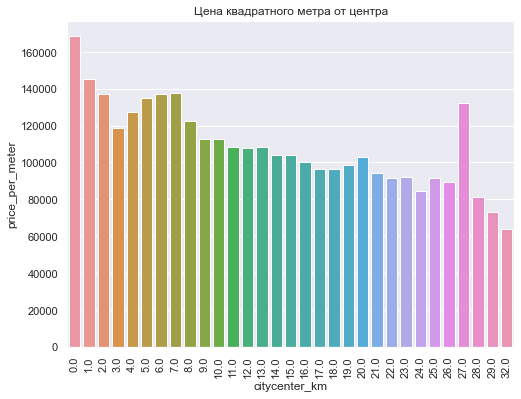

In [60]:
df_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']
df_spb = df_spb.pivot_table(index='citycenter_km', aggfunc={'price_per_meter': 'mean'}).reset_index()
sns.barplot(x='citycenter_km', y='price_per_meter', data=df_spb).set(title='Цена квадратного метра от центра')
plt.xticks(rotation=90)
plt. show()

Чем ближе к центру, тем дороже. Всплеск в цене на 27 километре, обусловлен небольшой выборкой квартир.

### Общий вывод

Цена квартиры прежде всего зависит от метража и расположения. Можно добиться небольшого снижения цены выбирая этажность квартиры, или начав поиск в определенном месяце, например в феврале и марте достаточно много объявлений, а цена на квартиры ниже.  
Я бы насторожилась, если бы объявление с интересной квартирой размещено больше трех месяцев. Возможно, там есть какие-то юридические ограничения или какой-то дефект в квартире.  
Зайдя на сайт для поиска квартиры в среднем вы увидите двухкумнатную квартиру за 4,5 млн.руб. на окраине города, общей площадью в 51 кв.м, расположенной на 4 этаже девятиэтажке. За исключением этажа, я в такой квартире провела всё свое детство в Санкт-Петербурге😉.